In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json


In [5]:
DATA = pd.read_csv("data/Africa_aggregated_data_up_to-2025-09-27.csv")
DATA.head()


,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,23-October-2004,Northern Africa,Algeria,Adrar,Battles,Armed clash,1,2,NaN,Political violence,47.0,26.4839,-1.388
1,23-April-2005,Northern Africa,Algeria,Adrar,Battles,Armed clash,1,0,NaN,Political violence,47.0,26.4839,-1.388
2,25-June-2005,Northern Africa,Algeria,Adrar,Battles,Armed clash,1,14,NaN,Political violence,47.0,26.4839,-1.388
3,13-December-2008,Northern Africa,Algeria,Adrar,Battles,Armed clash,1,3,NaN,Political violence,47.0,26.4839,-1.388
4,18-April-2009,Northern Africa,Algeria,Adrar,Battles,Armed clash,1,2,NaN,Political violence,47.0,26.4839,-1.388


In [8]:
df = DATA
df_kenya = df[(df['COUNTRY']== 'Kenya') & (df ['EVENT_TYPE'] == 'Protests')].copy() 

In [ ]:
df_kenya['DATE'] = pd.to_datetime(df_kenya['WEEK'])

df_kenya.set_index('DATE', inplace=True)
df_kenya.head()


,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
DATE,,,,,,,,,,,,,
1998-06-27,27-June-1998,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185
2003-07-12,12-July-2003,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185
2003-11-15,15-November-2003,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185
2007-12-22,22-December-2007,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185
2014-07-12,12-July-2014,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185


In [12]:
df_kenya['FATALITIES'] = df_kenya['FATALITIES'].fillna(0)

df_kenya['YEAR'] = df_kenya.index.year
df_kenya['MONTH'] = df_kenya.index.month

df_kenya.head()

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE,YEAR,MONTH
DATE,,,,,,,,,,,,,,,
1998-06-27,27-June-1998,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185,1998,6
2003-07-12,12-July-2003,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185,2003,7
2003-11-15,15-November-2003,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185,2003,11
2007-12-22,22-December-2007,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185,2007,12
2014-07-12,12-July-2014,Eastern Africa,Kenya,Baringo,Protests,Peaceful protest,1,0,NaN,Demonstrations,1535.0,0.7197,36.0185,2014,7


NameError: name 'mdates' is not defined

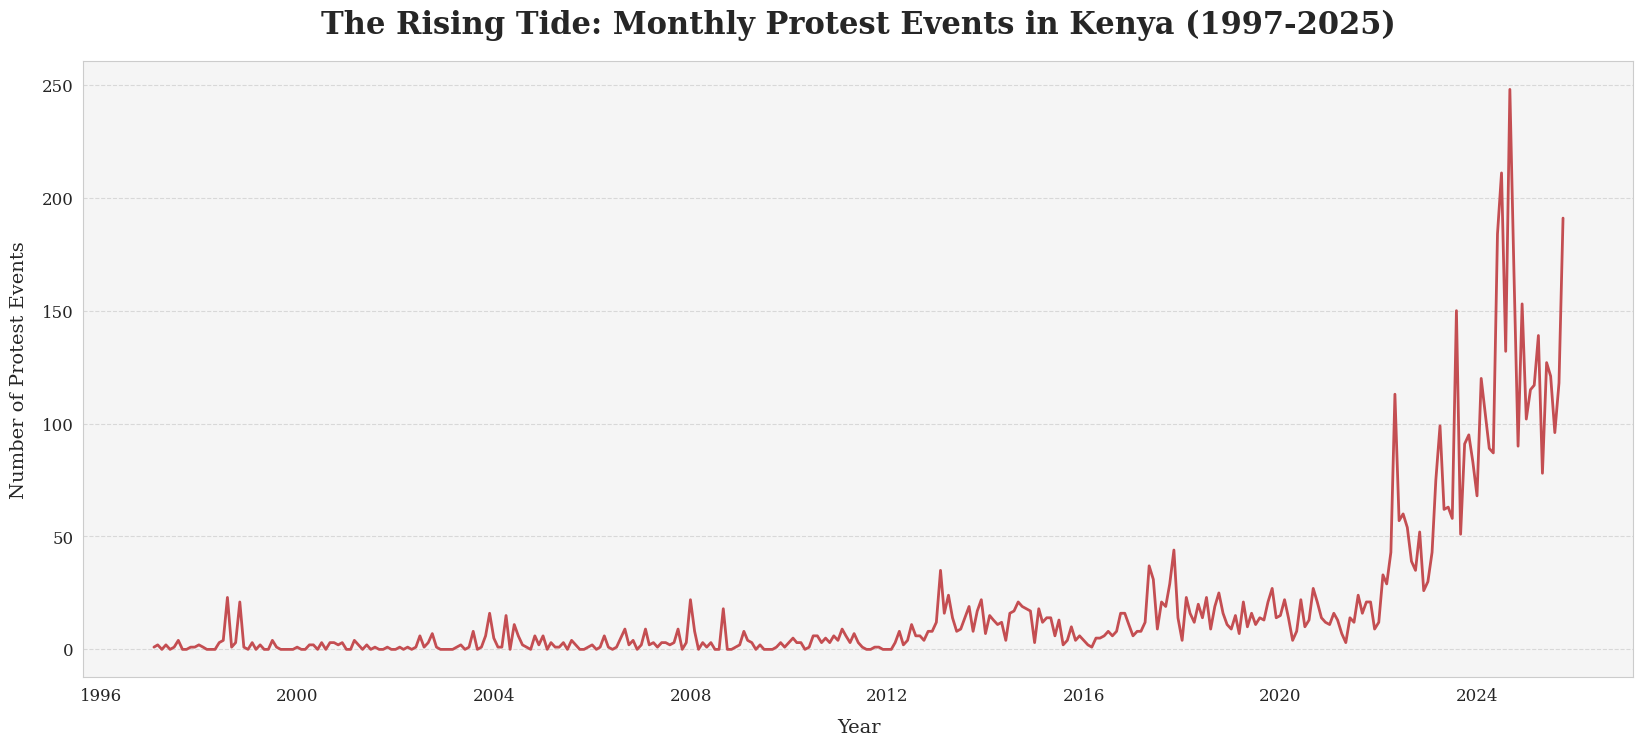

In [ ]:
# Style setup
sns.set_style("whitegrid", {'axes.grid': False})
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Data Aggregation
monthly_protests = df_kenya.resample('M')['EVENTS'].sum()

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(monthly_protests.index, monthly_protests.values, color='#c44e52', linewidth=2)

# More styles
ax.set_title("The Rising Tide: Monthly Protest Events in Kenya (1997-2025)", fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Protest Events", fontsize=14, labelpad=10)
ax.set_facecolor('#f5f5f5')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

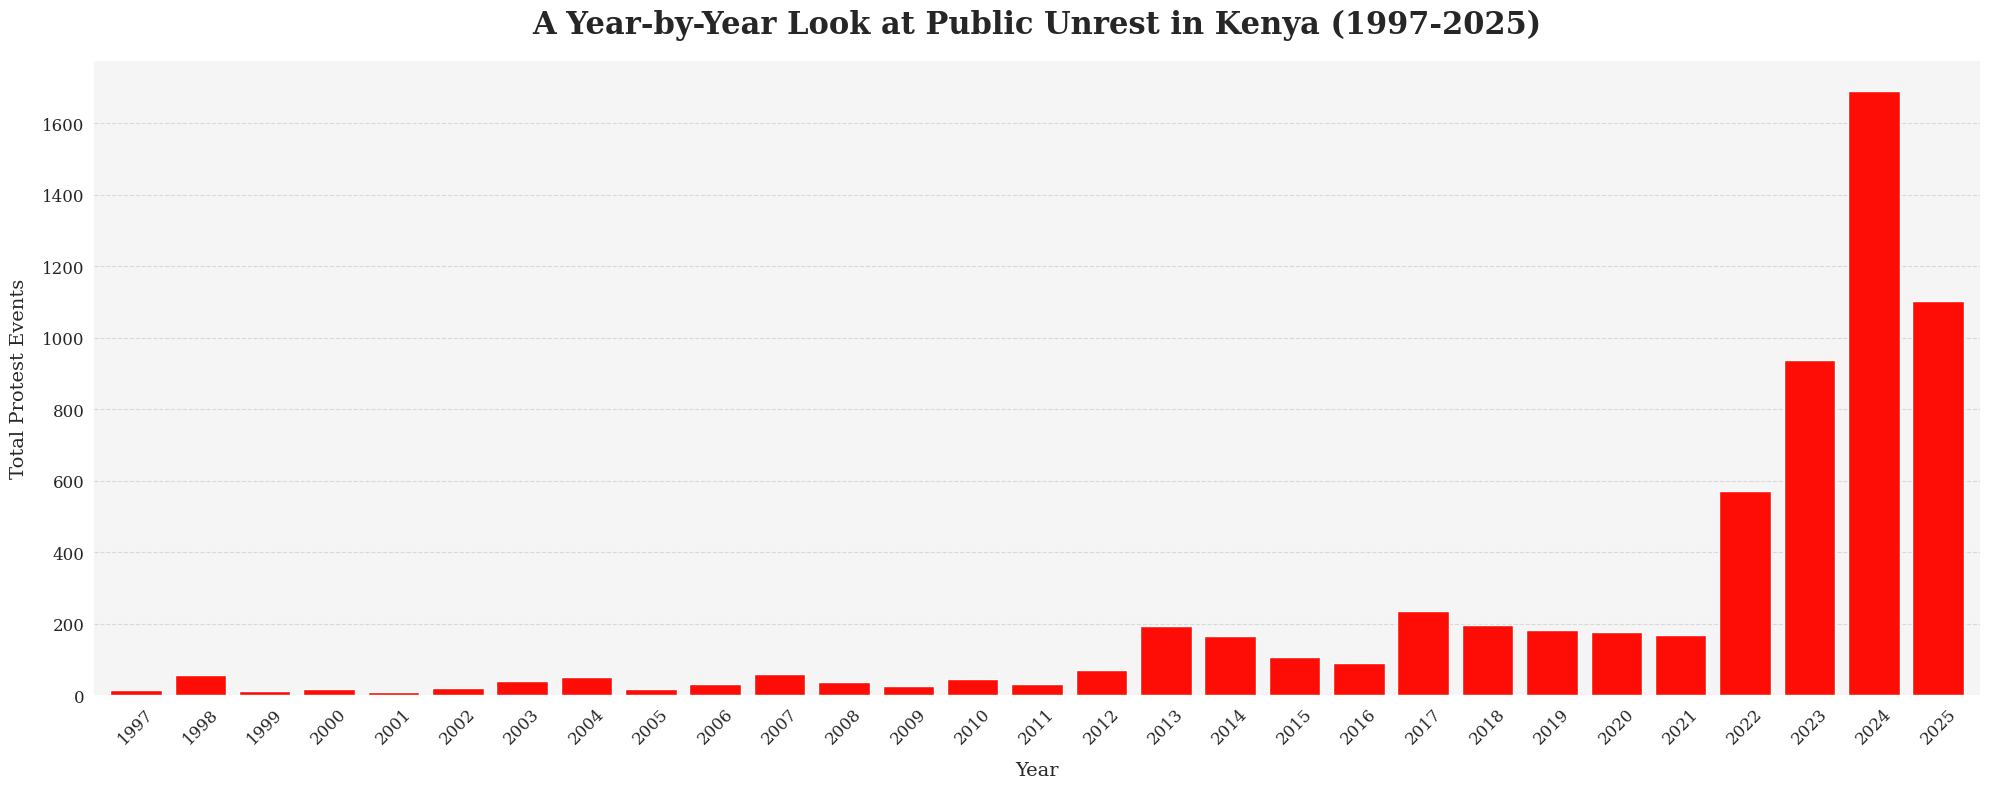

In [29]:
# Data Aggregation
yearly_protests = df_kenya.groupby('YEAR')['EVENTS'].sum()

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

yearly_protests.plot(kind= 'bar', ax=ax, color="#fd0d05", width=0.8)

# Style
ax.set_title("A Year-by-Year Look at Public Unrest in Kenya (1997-2025)", fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Total Protest Events", fontsize=14, labelpad=10)
ax.set_facecolor('#f5f5f5')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

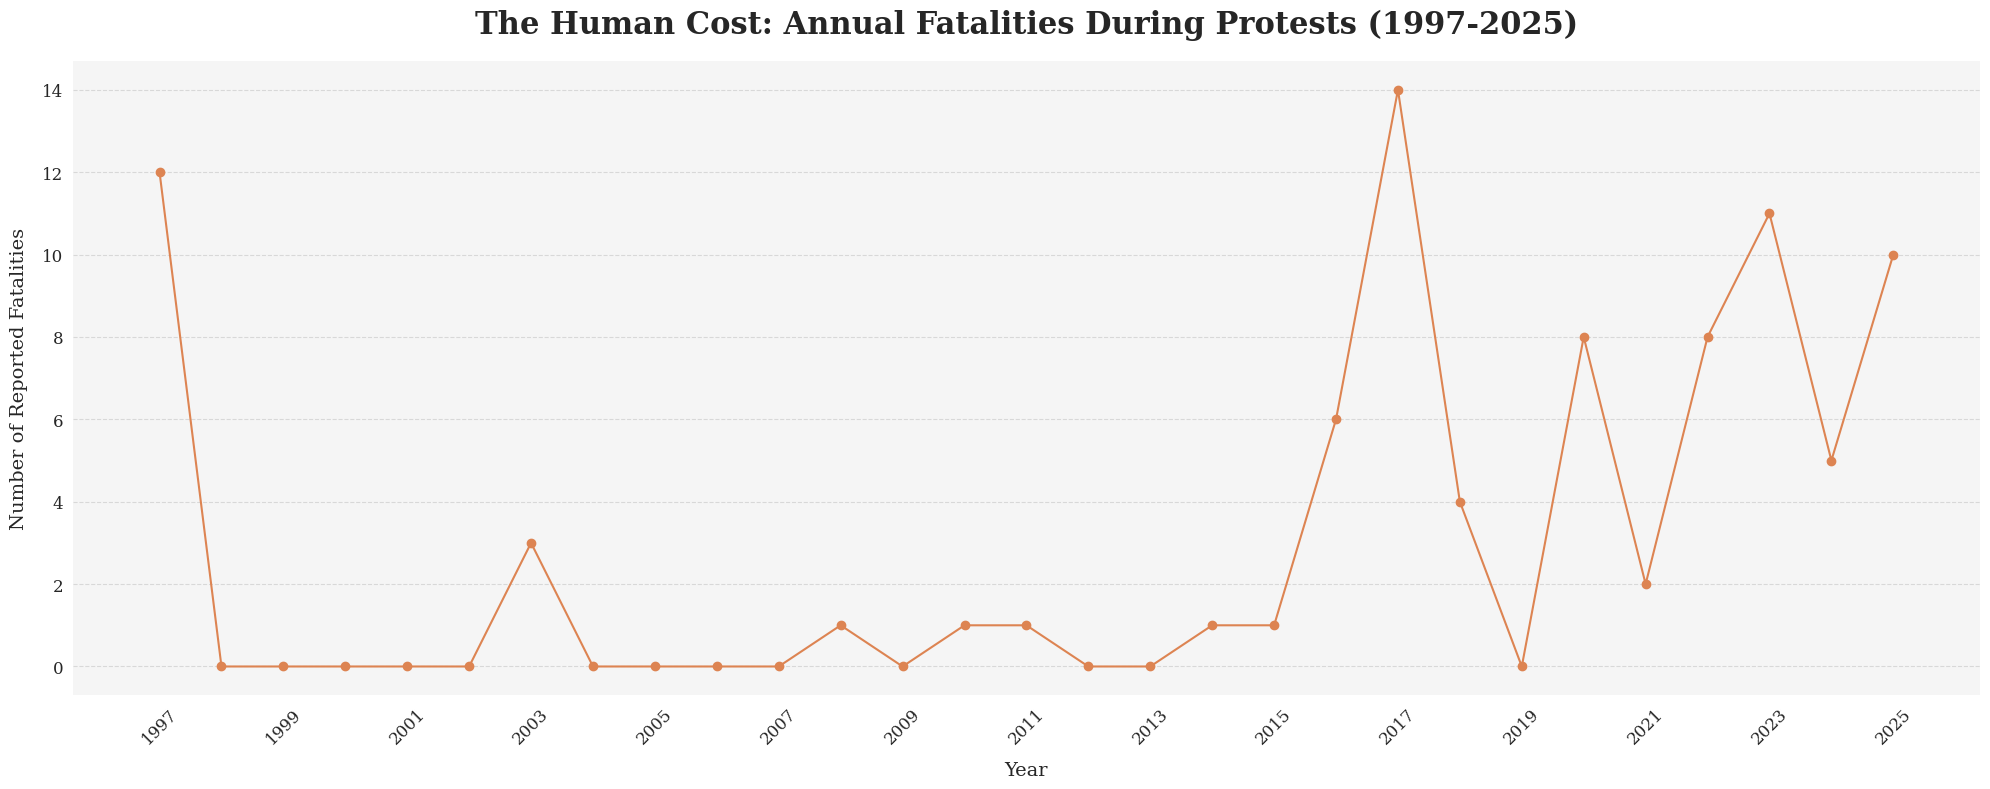

In [ ]:
# Data Aggregation
yearly_fatalities = df_kenya.groupby('YEAR')['FATALITIES'].sum()

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(yearly_fatalities.index, yearly_fatalities.values, color='#dd8452', marker='o', linestyle='-')

# Plot style
ax.set_title("The Human Cost: Annual Fatalities During Protests (1997-2025)", fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Reported Fatalities", fontsize=14, labelpad=10)
ax.set_facecolor('#f5f5f5')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(yearly_fatalities.index[::2]) # Show every other year for clarity
plt.xticks(rotation=45)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

TypeError: 'ArtistList' object is not callable

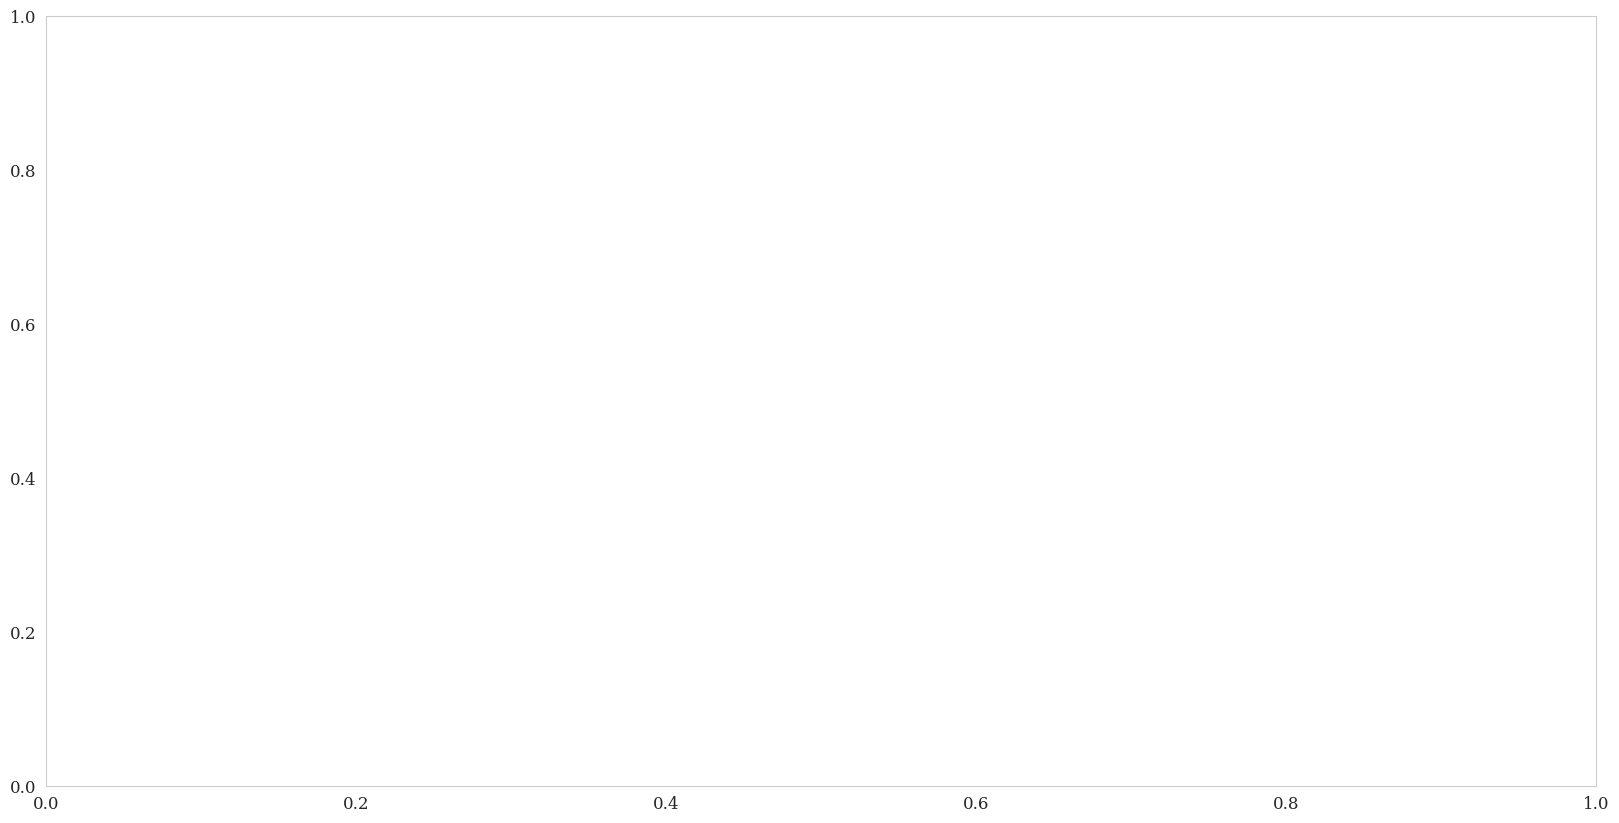

In [ ]:
# Graph with annotations
fig, ax = plt.subplots(figsize=(20, 10))

# Plot 
ax.lines(yearly_protests.index, yearly_protests.values, color='#4c72b0', alpha=0.7, label='Protest Events')

# Annotations 
election_years = [1997, 2002, 2007, 2013, 2017, 2022]
tax_hike_protests = [2023, 2024] # Finance Bill protests

# Election Spikes
for year in election_years:
    if year in yearly_protests.index:
        ax.axvline(x=year, color='#c44e52', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(2008, 350, 'Post-Election Violence', color='#c44e52', rotation=90, fontsize=12)

# Tax Spikes
for year in tax_hike_protests:
     if year in yearly_protests.index:
        ax.axvline(x=year, color='#55a868', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(2024.2, 200, 'Finance Bill Protests', color='#55a868', fontsize=12)

# Legend & Titles 
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#c44e52', lw=2, label='Election Year'),
                   Line2D([0], [0], color='#55a868', lw=2, label='Major Tax-Related Protests')]
ax.legend(handles=legend_elements, fontsize=12)

ax.set_title("Key Drivers of Protest Spikes: Elections & Economic Policy", fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Total Protest Events", fontsize=14, labelpad=10)
ax.set_facecolor('#f5f5f5')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [26]:
# --- You will need a Kenyan counties geojson file for this ---
# Download one from a source like: https://github.com/mstates/kenya-counties
# Let's assume the file is named 'kenya-counties.geojson'

# --- Data Aggregation ---
# ACLED uses 'ADMIN1' for first-level administrative divisions (counties in Kenya)
county_protests = df_kenya.groupby('ADMIN1')['EVENTS'].sum().reset_index()

# --- Geospatial Plotting ---
# Load the geojson file
gdf_kenya = gpd.read_file('data/kenyan_counties.json')

# Merge protest data with geospatial data
merged_gdf = gdf_kenya.set_index('COUNTY').join(county_protests.set_index('ADMIN1'))
merged_gdf['EVENTS'] = merged_gdf['EVENTS'].fillna(0) # Fill counties with no protests with 0

# --- Plotting ---
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

merged_gdf.plot(column='EVENTS',
                cmap='Reds',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                legend_kwds={'label': "Number of Protest Events (1997-2025)",
                             'orientation': "horizontal"})

# --- Professional Styling ---
ax.set_title("Hotspots of Dissent: Protest Concentration by County", fontsize=22, fontweight='bold', pad=20)
ax.set_axis_off()
plt.show()

DataSourceError: 'data/kenyan_counties.json' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

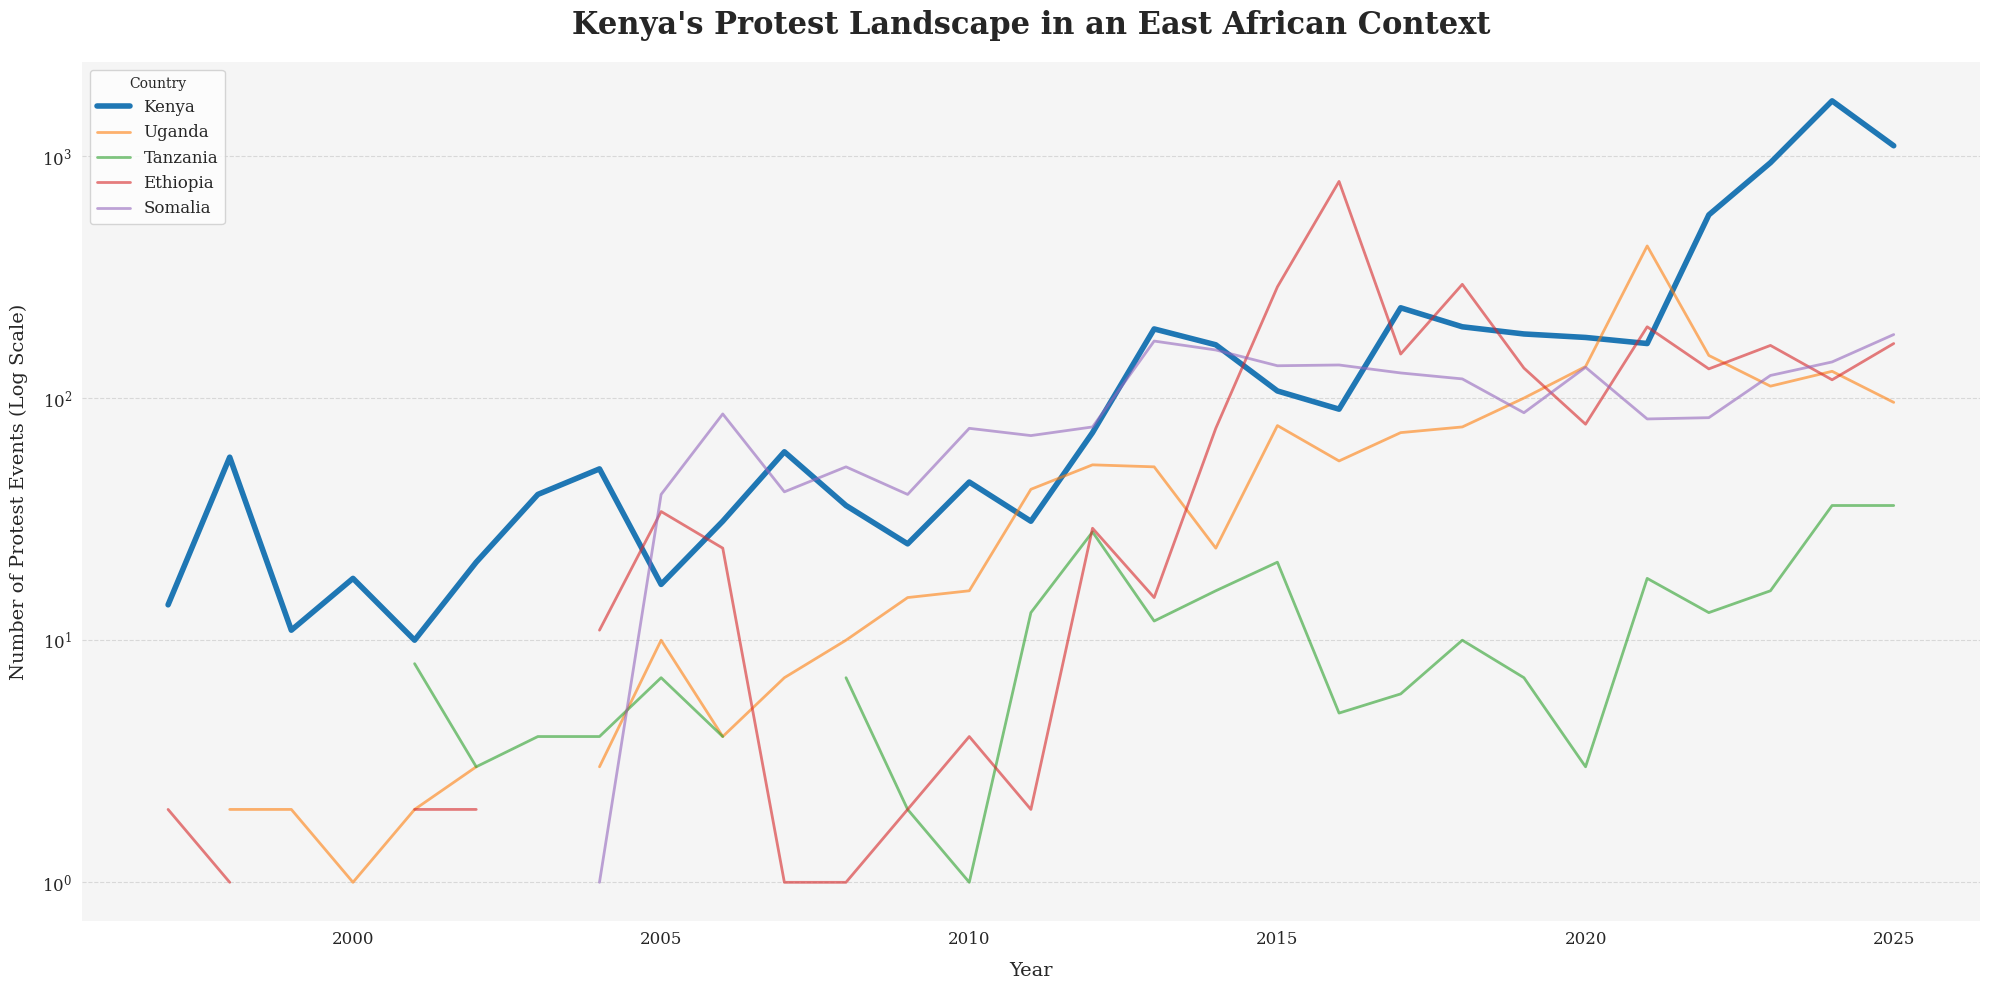

In [ ]:
# Aggregated Africa dataframe
df_protests_africa = df[df['EVENT_TYPE'] == 'Protests'].copy()
df_protests_africa['DATE'] = pd.to_datetime(df_protests_africa['WEEK'])
df_protests_africa['YEAR'] = df_protests_africa['DATE'].dt.year

# East African Countries
peers = ['Kenya', 'Uganda', 'Tanzania', 'Ethiopia', 'Somalia']
df_peers = df_protests_africa[df_protests_africa['COUNTRY'].isin(peers)]

# Data Aggregation
yearly_peer_protests = df_peers.groupby(['YEAR', 'COUNTRY'])['EVENTS'].sum().unstack()

# Plot
fig, ax = plt.subplots(figsize=(20, 10))

for country in peers:
    if country in yearly_peer_protests.columns:
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country],
                label=country,
                linewidth=4 if country == 'Kenya' else 2, # Make Kenya's line thicker
                alpha=1 if country == 'Kenya' else 0.6)   # Make other lines more transparent

# --- Professional Styling ---
ax.set_title("Kenya's Protest Landscape in an East African Context", fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Protest Events (Log Scale)", fontsize=14, labelpad=10)
ax.set_yscale('log') # Use a log scale for better comparison if numbers vary widely
ax.legend(title='Country', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#f5f5f5')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()